In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [46]:
def simulate(B,n, mu = 2, sigma =4, alpha = 0):
    
    matrix = np.random.normal(loc=mu, scale=sigma, size=(n, B))
    if alpha == 0:
        mean = np.mean(matrix, axis=0)
        return mean
    lower_limit = stats.norm.ppf(alpha/2, loc=mu, scale=sigma) 
    upper_limit = stats.norm.ppf(1 - alpha/2, loc=mu, scale=sigma)  
    matrix_trimmed = np.where((matrix >= lower_limit) & (matrix <= upper_limit), matrix, np.nan)
    mean = np.nanmean(matrix_trimmed, axis=0)
    return mean

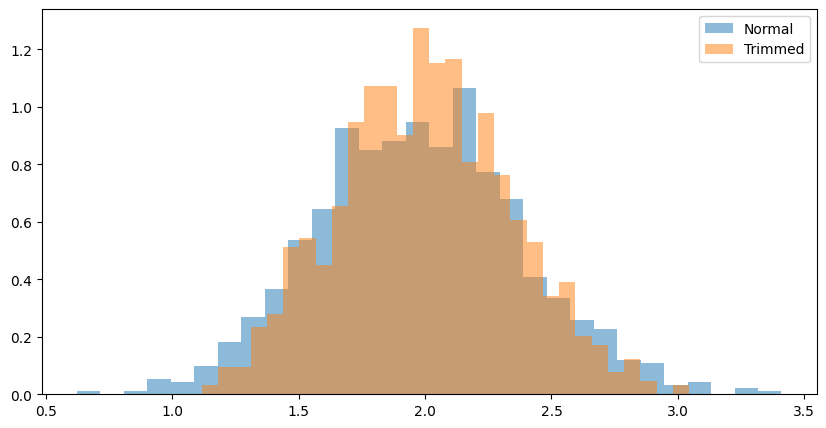

In [54]:
sim = simulate(1000, 100)
sim_trimmed = simulate(1000, 100, alpha=0.1)
plt.figure(figsize=(10,5))
plt.hist(sim, bins=30, density=True,alpha=0.5, label='Normal')
plt.hist(sim_trimmed, bins=30, density=True , alpha=0.5, label='Trimmed')
plt.legend()


In [55]:
ARE = np.var(sim)/np.var(sim_trimmed)
print(ARE)

1.417491087419324
